# Interpretation of animals actions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('x_train.csv')
X_train.head(15)

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,L_F_paw_y,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y
0,265,0,1,0,0,0,37,16,240,170,...,167,1,161,168,1,94,173,1,55,177
1,676,0,0,0,1,0,43,8,208,236,...,213,1,193,209,1,77,232,1,115,233
2,441,0,0,1,0,0,65,0,234,222,...,0,0,0,0,0,0,0,0,0,0
3,328,0,1,0,0,0,15,8,272,178,...,171,1,190,172,1,52,176,1,35,178
4,102,1,0,0,0,0,2,1,148,146,...,130,1,68,131,1,3,128,0,0,0
5,766,0,0,0,1,0,1,0,296,266,...,246,0,0,0,1,288,253,1,250,248
6,120,1,0,0,0,0,21,0,276,184,...,0,0,0,0,0,0,0,0,0,0
7,926,0,0,0,0,1,211,137,164,246,...,368,1,290,367,0,0,0,1,224,355
8,914,0,0,0,0,1,45,97,671,649,...,641,1,218,621,1,584,638,1,652,639
9,649,0,0,0,1,0,79,15,214,170,...,175,1,118,173,0,0,0,0,0,0


In [3]:
X_train.columns[X_train.isna().any()]

Index([], dtype='object')

In [4]:
y_train = pd.read_csv('y_train.csv')
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       676 non-null    int64
 1   nothing  676 non-null    int64
 2   stand    676 non-null    int64
 3   sit      676 non-null    int64
 4   lie      676 non-null    int64
 5   go       676 non-null    int64
 6   run      676 non-null    int64
dtypes: int64(7)
memory usage: 37.1 KB


Как можно заметить, в тренировочных данных нет пропусков.

## Подготовка данных

Index(['id', 'cat', 'cow', 'dog', 'horse', 'sheep', 'bounds_x', 'bounds_y',
       'bounds_width', 'bounds_height', 'L_eye_v', 'L_eye_x', 'L_eye_y',
       'R_eye_v', 'R_eye_y', 'L_ear_v', 'L_ear_x', 'L_ear_y', 'R_ear_v',
       'R_ear_y', 'Nose_v', 'Nose_y', 'Throat_v', 'Throat_x', 'Throat_y',
       'Tail_v', 'Tail_x', 'Tail_y', 'withers_y', 'R_F_elbow_x', 'R_B_knee_x',
       'R_B_paw_x'],
      dtype='object')


<Axes: >

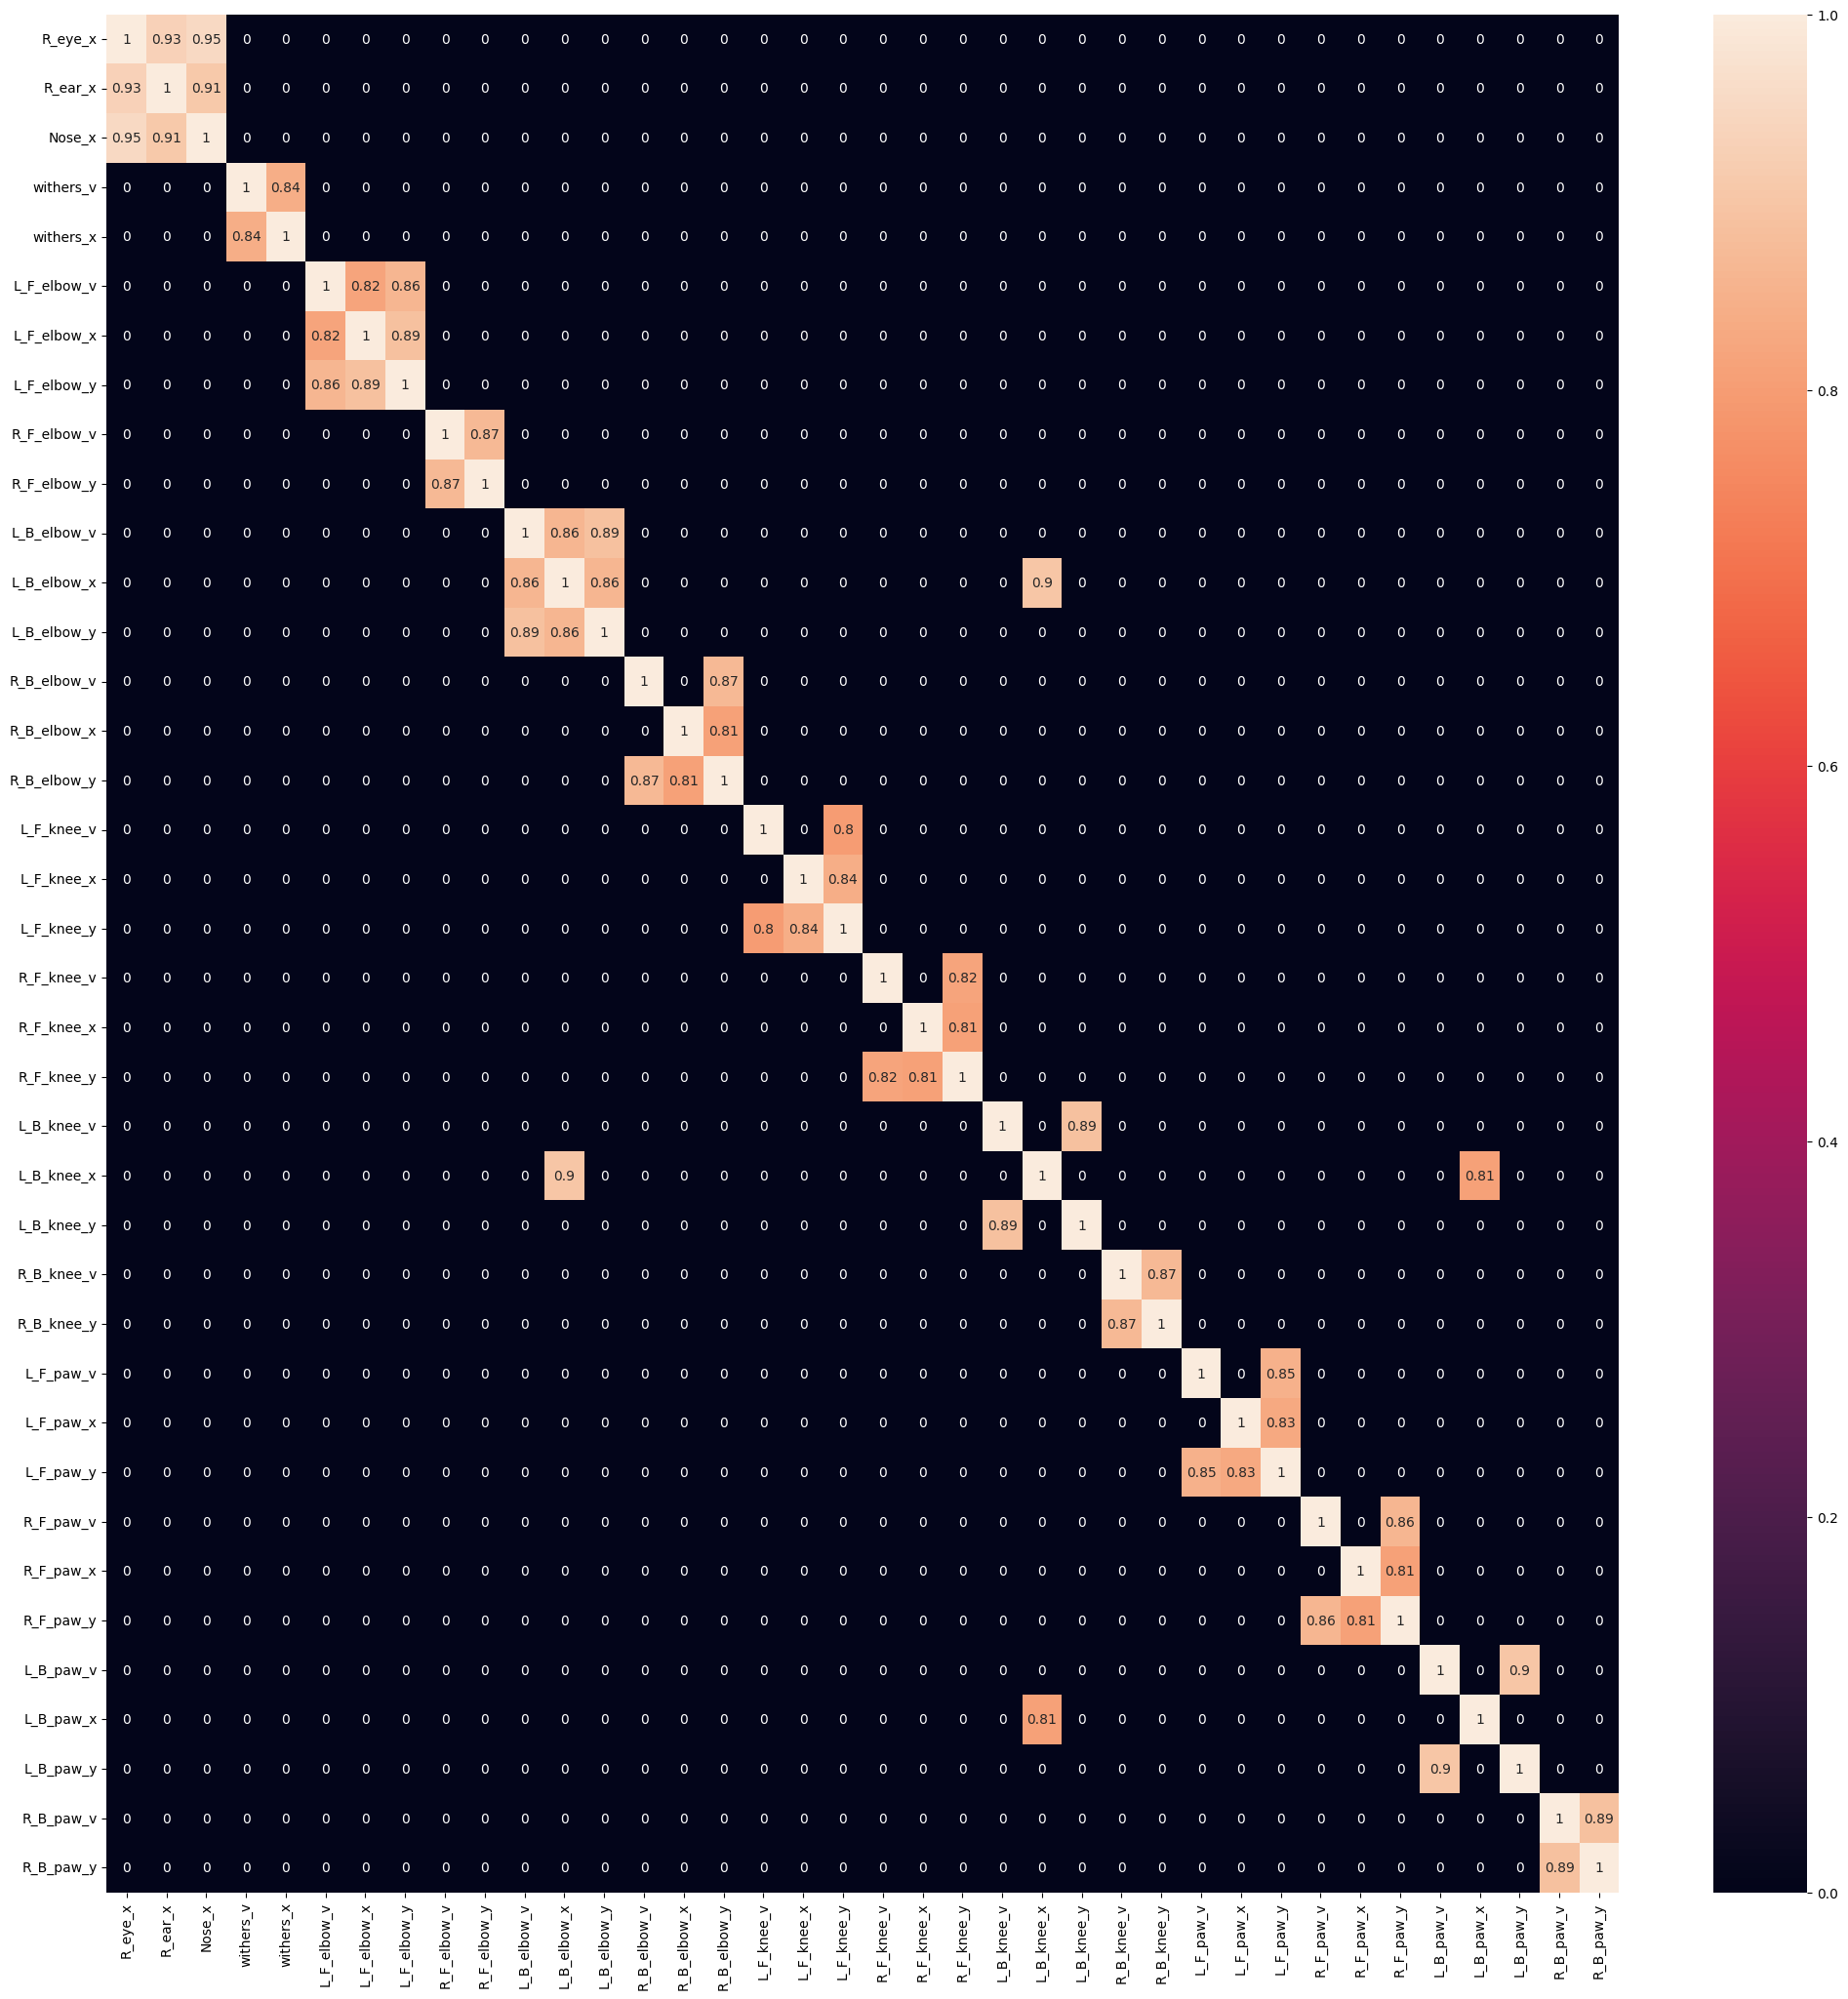

In [5]:
plt.figure(figsize=(25, 25))

corr_mtr = X_train.corr()
corr_mtr = np.round(corr_mtr, 2)
corr_mtr[np.abs(corr_mtr) < 0.8] = 0

no_corr_cols = corr_mtr.sum()[corr_mtr.sum() == 1].index
print(no_corr_cols)

corr_mtr.drop(no_corr_cols, axis=0, inplace=True)
corr_mtr.drop(no_corr_cols, axis=1, inplace=True)
sns.heatmap(corr_mtr, annot=True)

В парах коррелирующих друг с другом параметров удалим по одному, чтобы уменьшить количество столбцов.

In [6]:
cols_to_drop = []

for c in corr_mtr.columns:
    if c in corr_mtr.columns:
        c_corr = corr_mtr[c][0 < corr_mtr[c]]
        c_corr = c_corr[c_corr < 1].index 
        for el in c_corr:
            cols_to_drop.append(el)
        corr_mtr.drop(c_corr, axis=0, inplace=True)
        corr_mtr.drop(c_corr, axis=1, inplace=True)

print(cols_to_drop)

['R_ear_x', 'Nose_x', 'withers_x', 'L_F_elbow_x', 'L_F_elbow_y', 'R_F_elbow_y', 'L_B_elbow_x', 'L_B_elbow_y', 'R_B_elbow_y', 'L_F_knee_y', 'R_F_knee_y', 'L_B_knee_y', 'L_B_paw_x', 'R_B_knee_y', 'L_F_paw_y', 'R_F_paw_y', 'L_B_paw_y', 'R_B_paw_y']


In [7]:
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             676 non-null    int64
 1   cat            676 non-null    int64
 2   cow            676 non-null    int64
 3   dog            676 non-null    int64
 4   horse          676 non-null    int64
 5   sheep          676 non-null    int64
 6   bounds_x       676 non-null    int64
 7   bounds_y       676 non-null    int64
 8   bounds_width   676 non-null    int64
 9   bounds_height  676 non-null    int64
 10  L_eye_v        676 non-null    int64
 11  L_eye_x        676 non-null    int64
 12  L_eye_y        676 non-null    int64
 13  R_eye_v        676 non-null    int64
 14  R_eye_x        676 non-null    int64
 15  R_eye_y        676 non-null    int64
 16  L_ear_v        676 non-null    int64
 17  L_ear_x        676 non-null    int64
 18  L_ear_y        676 non-null    int64
 19  R_ear_v 

Вынесем названия животных в отдельный столбец.

In [8]:
animals = {'cat': 0, 'cow': 1, 'dog': 2, 'horse': 3, 'sheep': 4}

X_train['animal'] = X_train[animals.keys()].idxmax(axis=1).map(animals)
X_train.drop(animals.keys(), axis=1, inplace=True)

X_train.head()

,id,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,...,R_B_knee_v,R_B_knee_x,L_F_paw_v,L_F_paw_x,R_F_paw_v,R_F_paw_x,L_B_paw_v,R_B_paw_v,R_B_paw_x,animal
0,265,37,16,240,170,0,0,0,1,270,...,1,49,1,208,1,161,1,1,55,1
1,676,43,8,208,236,0,0,0,1,217,...,1,113,1,167,1,193,1,1,115,3
2,441,65,0,234,222,1,180,67,1,125,...,0,0,0,0,0,0,0,0,0,2
3,328,15,8,272,178,0,0,0,1,251,...,1,40,1,169,1,190,1,1,35,1
4,102,2,1,148,146,1,135,68,1,108,...,1,24,1,129,1,68,1,0,0,0


Поработает над y_train. Сделаем из него вектор, где значения от 0 до 5 будут означать состояние животного.

In [9]:
y_train.head()

,id,nothing,stand,sit,lie,go,run
0,265,0,0,0,0,1,0
1,676,0,0,0,0,1,0
2,441,1,0,0,0,0,0
3,328,0,1,0,0,0,0
4,102,0,0,0,1,0,0


In [10]:
labels = {'nothing': 0, 'stand': 1, 'sit': 2, 'lie': 3, 'go': 4, 'run': 5}

y_train['label'] = y_train[labels.keys()].idxmax(axis=1).map(labels)
y_train.drop(labels.keys(), axis=1, inplace=True)

y_train.head()

,id,label
0,265,4
1,676,4
2,441,0
3,328,1
4,102,3


Удалим столбцы ID.

In [11]:
y_train.drop('id', axis=1, inplace=True)
X_train.drop('id', axis=1, inplace=True)

## Решение задачи классификации. Обучение моделей.

Разделим данные на тренировочную и тестовую выборки.

In [12]:
from sklearn.model_selection import train_test_split

x_tr, x_t, y_tr, y_t = train_test_split(X_train, y_train, test_size=0.2, random_state=49)

### Решающее дерево

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree = DecisionTreeClassifier(criterion='gini', min_samples_split=6, random_state=99)
tree.fit(x_tr, y_tr)

y_pr = tree.predict(x_t)

f1_score(y_t, y_pr, average='micro')

0.5220588235294118

### Случайный лес

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=6, random_state=99)
forest.fit(x_tr, y_tr)

y_pr = forest.predict(x_t)

f1_score(y_t, y_pr, average='micro')

C:\Users\bychk\AppData\Local\Temp\ipykernel_19216\2433296918.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_tr, y_tr)


0.7058823529411765

### Градиентный бустинг

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=1000, max_depth=20, min_samples_split=6, random_state=99)
boosting.fit(x_tr, y_tr)

y_pr = boosting.predict(x_t)

f1_score(y_t, y_pr, average='micro')

C:\Users\bychk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6323529411764706

## Решение задачи классифкации. Тестовые данные.

In [16]:
X_test = pd.read_csv('x_test.csv')
X_test.head()

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,L_F_paw_y,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y
0,582,0,0,0,1,0,59,30,234,156,...,179,1,141,177,1,196,172,1,255,169
1,42,1,0,0,0,0,73,2,170,174,...,171,1,158,161,1,142,152,1,105,152
2,148,1,0,0,0,0,1,8,180,242,...,234,1,83,231,0,0,0,1,52,200
3,737,0,0,0,1,0,19,6,226,160,...,0,1,205,140,1,95,163,1,50,162
4,213,0,1,0,0,0,0,2,297,296,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ID = X_test['id']

In [18]:
X_test.drop(cols_to_drop, axis=1, inplace=True)

X_test['animal'] = X_test[animals.keys()].idxmax(axis=1).map(animals)
X_test.drop(animals.keys(), axis=1, inplace=True)

X_test.drop('id', axis=1, inplace=True)

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   bounds_x       291 non-null    int64
 1   bounds_y       291 non-null    int64
 2   bounds_width   291 non-null    int64
 3   bounds_height  291 non-null    int64
 4   L_eye_v        291 non-null    int64
 5   L_eye_x        291 non-null    int64
 6   L_eye_y        291 non-null    int64
 7   R_eye_v        291 non-null    int64
 8   R_eye_x        291 non-null    int64
 9   R_eye_y        291 non-null    int64
 10  L_ear_v        291 non-null    int64
 11  L_ear_x        291 non-null    int64
 12  L_ear_y        291 non-null    int64
 13  R_ear_v        291 non-null    int64
 14  R_ear_y        291 non-null    int64
 15  Nose_v         291 non-null    int64
 16  Nose_y         291 non-null    int64
 17  Throat_v       291 non-null    int64
 18  Throat_x       291 non-null    int64
 19  Throat_y

### Решающее дерево

In [20]:
y_pred = tree.predict(X_test)

result = pd.DataFrame({'id': ID, 'label': y_pred})

result.to_csv('result.csv', index=False)

### Случайный лес

In [21]:
y_pred = forest.predict(X_test)

result = pd.DataFrame({'id': ID, 'label': y_pred})

result.to_csv('result.csv', index=False)

### Градиентный бустинг

In [22]:
y_pred = boosting.predict(X_test)

result = pd.DataFrame({'id': ID, 'label': y_pred})

result.to_csv('result.csv', index=False)